In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:
df = pd.read_csv("features_with_labels.csv")

## Подготовка данных

#### Список ключевых признаков

In [28]:
selected_features = [
    'stars_count',
    'mean_repo_stars',
    'total_repos',
    'active_repos',
    'mean_half_year_commits',
    'days_since_last_commit',
    'num_languages',
    'description_length',
    'has_description',
    'topics_per_language'
]

X = df[selected_features].copy()
y = df['company_type']

#### Кодирование и масштабирование

In [29]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_df = pd.DataFrame(X_scaled, columns=selected_features)
y_encoded

array([2, 2, 1, 0, 0, 0, 0, 3, 0, 2, 2, 0, 3, 2, 2, 3, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 2, 1, 3, 0, 0, 0,
       0, 3, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 2, 2, 3, 1, 2, 0, 3,
       0, 0, 0, 2, 2, 0, 2, 3, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 3, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 1,
       0, 0, 0, 2, 2, 3, 2, 2, 1, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 3, 2, 3, 0, 1, 2, 2, 0, 2, 2, 0, 1,

## Логистическая регрессия

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


                precision    recall  f1-score   support

      archived       0.98      1.00      0.99        42
high_potential       1.00      1.00      1.00         5
    niche_tech       1.00      1.00      1.00        29
 stable_growth       1.00      0.86      0.92         7

      accuracy                           0.99        83
     macro avg       0.99      0.96      0.98        83
  weighted avg       0.99      0.99      0.99        83



C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


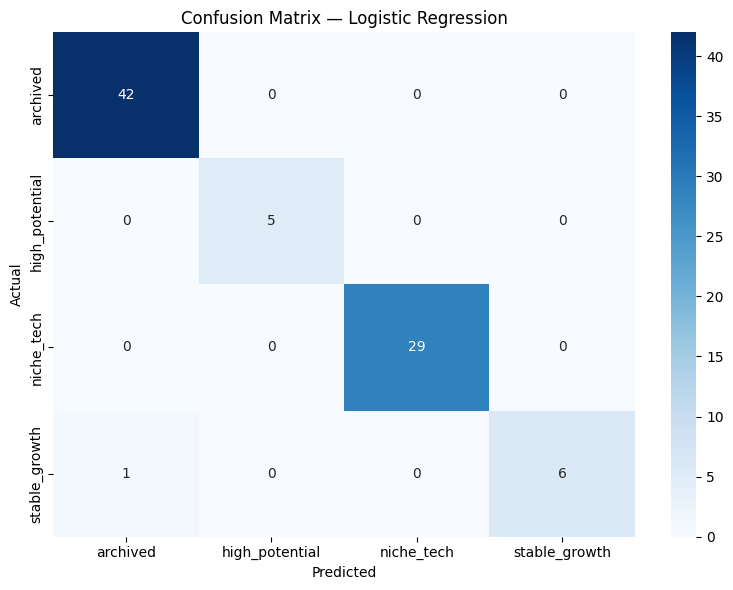

In [33]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.tight_layout()
plt.show()

## Случайный лес

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

rf_report = classification_report(y_test, y_rf_pred, target_names=label_encoder.classes_)
print(rf_report)

                precision    recall  f1-score   support

      archived       1.00      0.98      0.99        42
high_potential       1.00      0.60      0.75         5
    niche_tech       0.90      0.97      0.93        29
 stable_growth       0.88      1.00      0.93         7

      accuracy                           0.95        83
     macro avg       0.94      0.89      0.90        83
  weighted avg       0.96      0.95      0.95        83



In [36]:
print(X_train.shape)

(332, 10)


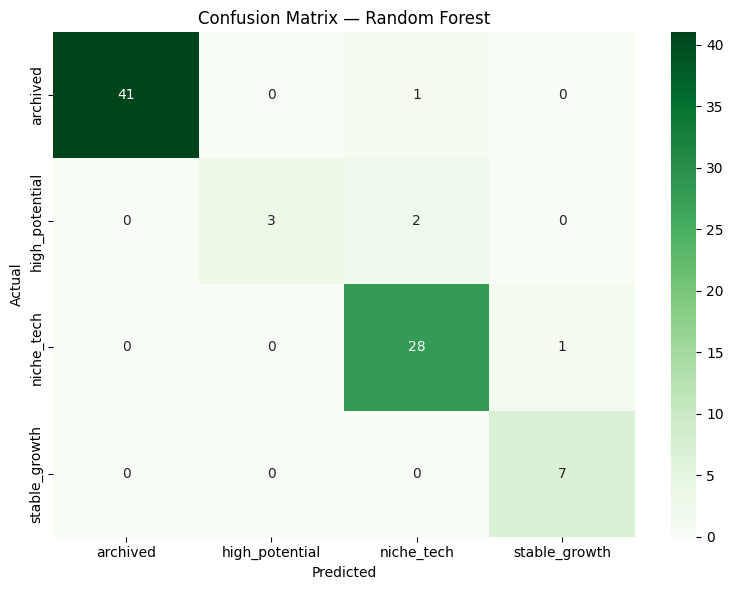

In [37]:
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.show()

## Градиентный бустинг

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_gb_pred = gb.predict(X_test)

gb_report = classification_report(y_test, y_gb_pred, target_names=label_encoder.classes_)
print(gb_report)

                precision    recall  f1-score   support

      archived       0.98      0.98      0.98        42
high_potential       1.00      0.60      0.75         5
    niche_tech       0.91      1.00      0.95        29
 stable_growth       1.00      0.86      0.92         7

      accuracy                           0.95        83
     macro avg       0.97      0.86      0.90        83
  weighted avg       0.96      0.95      0.95        83



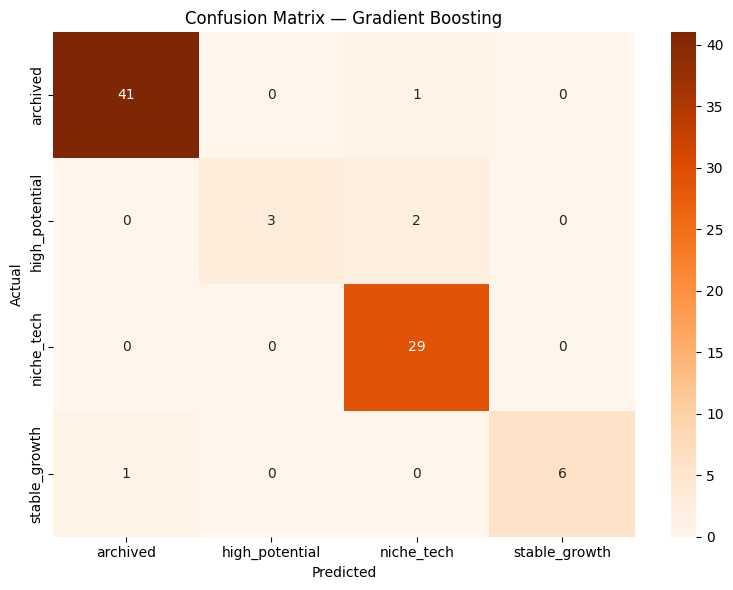

In [40]:
gb_conf_matrix = confusion_matrix(y_test, y_gb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Gradient Boosting")
plt.tight_layout()
plt.show()

## Графики важности признаков

In [41]:
# Важности из случайного леса
rf_importances = rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1]
rf_top_features = [selected_features[i] for i in rf_sorted_idx[:10]]
rf_top_scores = rf_importances[rf_sorted_idx[:10]]

# Важности из градиентного бустинга
gb_importances = gb.feature_importances_
gb_sorted_idx = np.argsort(gb_importances)[::-1]
gb_top_features = [selected_features[i] for i in gb_sorted_idx[:10]]
gb_top_scores = gb_importances[gb_sorted_idx[:10]]

C:\Users\Мария\AppData\Local\Temp\ipykernel_20064\3897820275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_top_scores, y=rf_top_features, ax=axs[0], palette="Greens_d")
C:\Users\Мария\AppData\Local\Temp\ipykernel_20064\3897820275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_top_scores, y=gb_top_features, ax=axs[1], palette="Oranges_d")


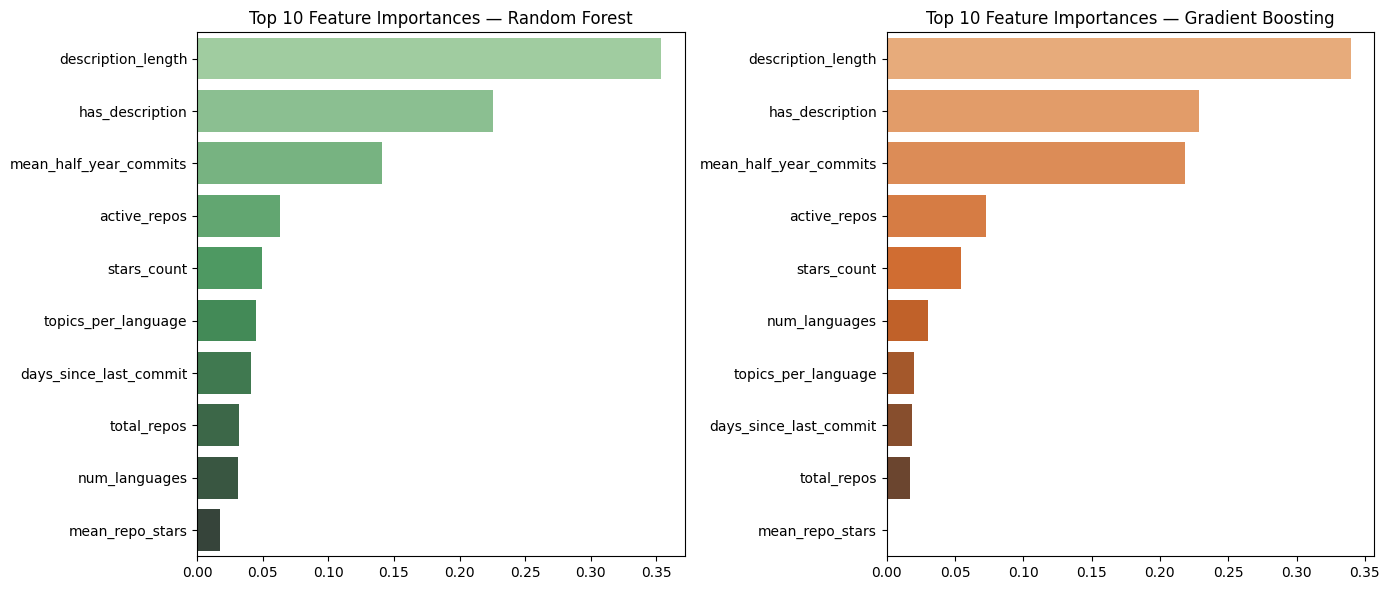

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=rf_top_scores, y=rf_top_features, ax=axs[0], palette="Greens_d")
axs[0].set_title("Top 10 Feature Importances — Random Forest")

sns.barplot(x=gb_top_scores, y=gb_top_features, ax=axs[1], palette="Oranges_d")
axs[1].set_title("Top 10 Feature Importances — Gradient Boosting")

plt.tight_layout()
plt.show()

## Ансамблевая модель

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
# логрег + лес + бустинг
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf),  # логистическая регрессия
        ('rf', rf),   # случайный лес
        ('gb', gb)    # градиентный бустинг
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_vote_pred = voting_clf.predict(X_test)

vote_report = classification_report(y_test, y_vote_pred, target_names=label_encoder.classes_)
print(vote_report)

C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                precision    recall  f1-score   support

      archived       0.98      1.00      0.99        42
high_potential       1.00      0.60      0.75         5
    niche_tech       0.94      1.00      0.97        29
 stable_growth       1.00      0.86      0.92         7

      accuracy                           0.96        83
     macro avg       0.98      0.86      0.91        83
  weighted avg       0.97      0.96      0.96        83



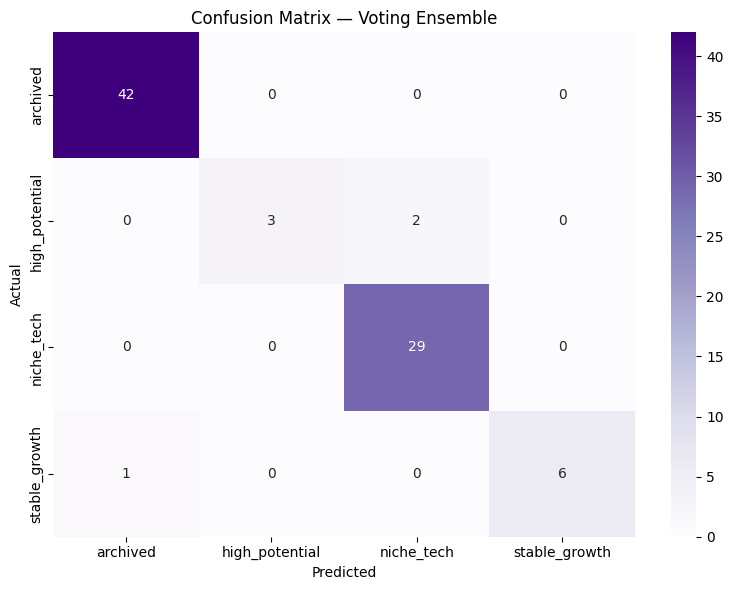

In [45]:
vote_conf_matrix = confusion_matrix(y_test, y_vote_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(vote_conf_matrix, annot=True, fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Voting Ensemble")
plt.tight_layout()
plt.show()

In [46]:
coef_df = pd.DataFrame(clf.coef_, columns=selected_features)
coef_df.index = label_encoder.classes_

# Коэффициенты для класса 'high_potential'
coef_df.loc["high_potential"].sort_values(ascending=False).head(10)


topics_per_language       1.219261
active_repos              0.997347
num_languages             0.954040
stars_count               0.812057
mean_repo_stars           0.404575
total_repos               0.281069
description_length        0.213068
has_description           0.143049
mean_half_year_commits   -0.077714
days_since_last_commit   -0.126609
Name: high_potential, dtype: float64

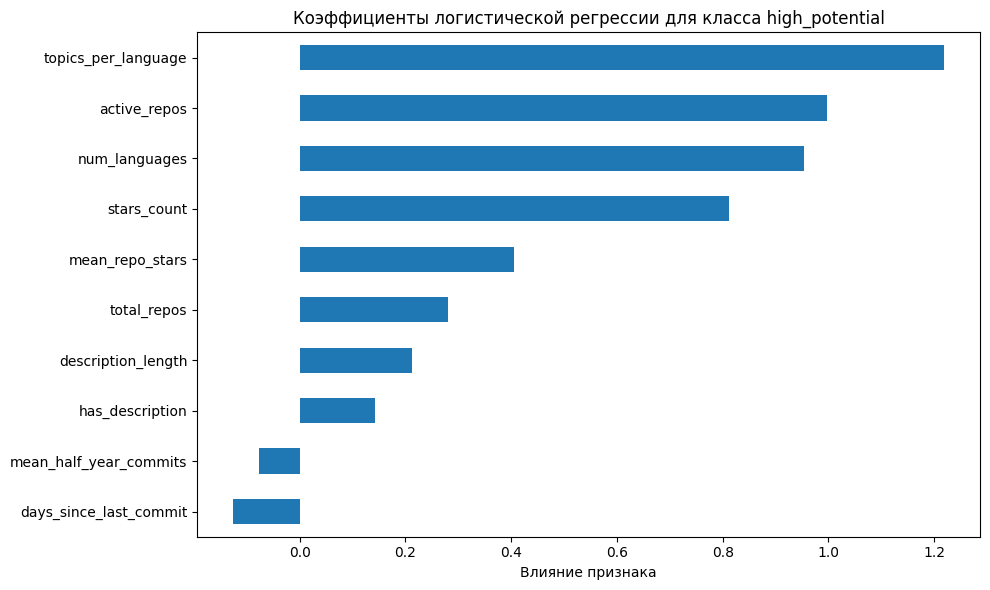

In [47]:
coef = coef_df.loc["high_potential"].sort_values()
plt.figure(figsize=(10, 6))
coef.plot(kind='barh')
plt.title("Коэффициенты логистической регрессии для класса high_potential")
plt.xlabel("Влияние признака")
plt.tight_layout()
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold

# F1 macro scorer
f1_macro = make_scorer(f1_score, average='macro')

# Список моделей
models = {
    "Logistic Regression": clf,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "Voting Ensemble": voting_clf
}

# Выполняем кросс-валидацию
for name, model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_scaled, y_encoded, cv=cv, scoring=f1_macro)
    print(f"{name}: F1-macro (mean) = {scores.mean():.3f}, std = {scores.std():.3f}")

C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

Logistic Regression: F1-macro (mean) = 0.947, std = 0.029
Random Forest: F1-macro (mean) = 0.903, std = 0.041
Gradient Boosting: F1-macro (mean) = 0.917, std = 0.012


C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Мария\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

Voting Ensemble: F1-macro (mean) = 0.945, std = 0.016
